In [1]:
import numpy as np
from keras.models import Sequential
import keras.backend as K
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
training_data = np.load('./output/training_data.npy')
training_labels = np.load('./output/training_tree.npy')

In [3]:
training_data.shape

(500, 100, 1000, 1)

In [4]:
training_labels.shape

(500, 300)

In [5]:
# zero_padding_array.shape

In [6]:
# print(training_data.shape)
# training_data = np.concatenate([training_data, zero_padding_array], axis=2)
print(training_data.shape)

print(training_labels.shape)

samples_count = training_data.shape[0]

train_size = math.floor(0.85*training_data.shape[0])

shuffle_indices = random.sample(range(0, samples_count), samples_count)

indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

X_train = training_data[indices_train,:]
Y_train = training_labels[indices_train]

X_test = training_data[indices_test,:]
Y_test = training_labels[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

np.save('./output/X_test.npy', X_test)
np.save('./output/Y_test.npy', Y_test)


(500, 100, 1000, 1)
(500, 300)
X_train.shape :  (425, 100, 1000, 1)
X_test.shape :  (75, 100, 1000, 1)
Y_train.shape :  (425, 300)
Y_test.shape :  (75, 300)


In [7]:
model = Sequential()

# Layer 1
model.add(Conv2D(10, input_shape=X_train.shape[1:], kernel_size=(3,3), strides=(1,1)))
#model.add(Conv2D(48, input_shape=(400,11,1), kernel_size=(2,2), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(5, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(Conv2D(5, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
model.add(Conv2D(1, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5
model.add(Flatten())
model.add(Dense(300, activation='relu'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 998, 10)       100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 998, 10)       40        
_________________________________________________________________
activation_1 (Activation)    (None, 98, 998, 10)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 499, 10)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 497, 5)        455       
_________________________________________________________________
batch_normalization_2 (Batch (None, 47, 497, 5)        20        
_________________________________________________________________
activation_2 (Activation)    (None, 47, 497, 5)       

In [9]:
# (4) Compile 
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [10]:
# (5) Train
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=1000, verbose=1)

model.save('./output/CNN_model_03.h5')

Train on 425 samples, validate on 75 samples
Epoch 1/1000
425/425 [==============================] - 11s 26ms/step - loss: 1942.9813 - accuracy: 0.0024 - val_loss: 1847.9220 - val_accuracy: 0.0000e+00
Epoch 2/1000
425/425 [==============================] - 10s 23ms/step - loss: 1851.1556 - accuracy: 0.0024 - val_loss: 1828.9877 - val_accuracy: 0.0000e+00
Epoch 3/1000
425/425 [==============================] - 10s 23ms/step - loss: 1745.1384 - accuracy: 0.0000e+00 - val_loss: 1800.3384 - val_accuracy: 0.0000e+00
Epoch 4/1000
425/425 [==============================] - 10s 23ms/step - loss: 1640.9110 - accuracy: 0.0024 - val_loss: 1771.6277 - val_accuracy: 0.0000e+00
Epoch 5/1000
425/425 [==============================] - 10s 23ms/step - loss: 1543.7061 - accuracy: 0.0071 - val_loss: 1719.0775 - val_accuracy: 0.0000e+00
Epoch 6/1000
425/425 [==============================] - 10s 22ms/step - loss: 1455.6824 - accuracy: 0.0212 - val_loss: 1655.9653 - val_accuracy: 0.0000e+00
Epoch 7/1000
42

Epoch 54/1000
425/425 [==============================] - 10s 23ms/step - loss: 971.3701 - accuracy: 0.0518 - val_loss: 981.2943 - val_accuracy: 0.0267
Epoch 55/1000
425/425 [==============================] - 10s 23ms/step - loss: 968.9011 - accuracy: 0.0518 - val_loss: 967.4800 - val_accuracy: 0.0267
Epoch 56/1000
425/425 [==============================] - 10s 22ms/step - loss: 965.9140 - accuracy: 0.0518 - val_loss: 957.6698 - val_accuracy: 0.0267
Epoch 57/1000
425/425 [==============================] - 10s 22ms/step - loss: 965.8172 - accuracy: 0.0588 - val_loss: 958.4329 - val_accuracy: 0.0267
Epoch 58/1000
425/425 [==============================] - 10s 23ms/step - loss: 964.4411 - accuracy: 0.0565 - val_loss: 957.6551 - val_accuracy: 0.0267
Epoch 59/1000
425/425 [==============================] - 10s 23ms/step - loss: 960.9940 - accuracy: 0.0518 - val_loss: 960.5536 - val_accuracy: 0.0267
Epoch 60/1000
425/425 [==============================] - 10s 23ms/step - loss: 959.4032 - accu

425/425 [==============================] - 10s 23ms/step - loss: 914.5853 - accuracy: 0.0635 - val_loss: 1007.4418 - val_accuracy: 0.0267
Epoch 109/1000
425/425 [==============================] - 10s 22ms/step - loss: 913.3867 - accuracy: 0.0753 - val_loss: 969.6638 - val_accuracy: 0.0267
Epoch 110/1000
425/425 [==============================] - 10s 23ms/step - loss: 912.8943 - accuracy: 0.0659 - val_loss: 955.2960 - val_accuracy: 0.0133
Epoch 111/1000
425/425 [==============================] - 10s 23ms/step - loss: 911.8173 - accuracy: 0.0682 - val_loss: 953.3432 - val_accuracy: 0.0133
Epoch 112/1000
425/425 [==============================] - 10s 23ms/step - loss: 911.5963 - accuracy: 0.0800 - val_loss: 959.0690 - val_accuracy: 0.0133
Epoch 113/1000
425/425 [==============================] - 10s 23ms/step - loss: 910.7776 - accuracy: 0.0753 - val_loss: 953.6185 - val_accuracy: 0.0133
Epoch 114/1000
425/425 [==============================] - 10s 23ms/step - loss: 909.6281 - accuracy: 0

Epoch 162/1000
425/425 [==============================] - 10s 23ms/step - loss: 883.3391 - accuracy: 0.0824 - val_loss: 986.0536 - val_accuracy: 0.0400
Epoch 163/1000
425/425 [==============================] - 10s 23ms/step - loss: 883.2859 - accuracy: 0.0824 - val_loss: 967.0530 - val_accuracy: 0.0267
Epoch 164/1000
425/425 [==============================] - 9s 22ms/step - loss: 882.5788 - accuracy: 0.0800 - val_loss: 970.7907 - val_accuracy: 0.0267
Epoch 165/1000
425/425 [==============================] - 10s 23ms/step - loss: 881.1741 - accuracy: 0.0800 - val_loss: 971.9638 - val_accuracy: 0.0267
Epoch 166/1000
425/425 [==============================] - 10s 23ms/step - loss: 880.8925 - accuracy: 0.0871 - val_loss: 980.1277 - val_accuracy: 0.0400
Epoch 167/1000
425/425 [==============================] - 10s 23ms/step - loss: 879.9794 - accuracy: 0.0894 - val_loss: 968.5651 - val_accuracy: 0.0400
Epoch 168/1000
425/425 [==============================] - 10s 23ms/step - loss: 879.7821 

Epoch 216/1000
425/425 [==============================] - 10s 23ms/step - loss: 861.1657 - accuracy: 0.0729 - val_loss: 983.4129 - val_accuracy: 0.0400
Epoch 217/1000
425/425 [==============================] - 10s 23ms/step - loss: 861.5487 - accuracy: 0.0824 - val_loss: 979.2622 - val_accuracy: 0.0400
Epoch 218/1000
425/425 [==============================] - 10s 23ms/step - loss: 860.8687 - accuracy: 0.0776 - val_loss: 981.8249 - val_accuracy: 0.0400
Epoch 219/1000
425/425 [==============================] - 10s 23ms/step - loss: 861.0062 - accuracy: 0.0871 - val_loss: 983.3019 - val_accuracy: 0.0533
Epoch 220/1000
425/425 [==============================] - 10s 23ms/step - loss: 859.3614 - accuracy: 0.0847 - val_loss: 985.4537 - val_accuracy: 0.0400
Epoch 221/1000
425/425 [==============================] - 10s 22ms/step - loss: 859.7812 - accuracy: 0.0847 - val_loss: 987.9505 - val_accuracy: 0.0400
Epoch 222/1000
425/425 [==============================] - 10s 23ms/step - loss: 859.3598

Epoch 270/1000
425/425 [==============================] - 10s 23ms/step - loss: 846.3452 - accuracy: 0.0847 - val_loss: 991.1353 - val_accuracy: 0.0533
Epoch 271/1000
425/425 [==============================] - 10s 23ms/step - loss: 845.8616 - accuracy: 0.0894 - val_loss: 996.8307 - val_accuracy: 0.0400
Epoch 272/1000
425/425 [==============================] - 10s 23ms/step - loss: 846.1584 - accuracy: 0.0824 - val_loss: 994.6863 - val_accuracy: 0.0267
Epoch 273/1000
425/425 [==============================] - 9s 22ms/step - loss: 845.3635 - accuracy: 0.0965 - val_loss: 998.1011 - val_accuracy: 0.0400
Epoch 274/1000
425/425 [==============================] - 10s 23ms/step - loss: 845.4787 - accuracy: 0.0918 - val_loss: 995.2447 - val_accuracy: 0.0400
Epoch 275/1000
425/425 [==============================] - 10s 23ms/step - loss: 845.8879 - accuracy: 0.0894 - val_loss: 1002.4782 - val_accuracy: 0.0400
Epoch 276/1000
425/425 [==============================] - 10s 23ms/step - loss: 843.8393

Epoch 324/1000
425/425 [==============================] - 10s 23ms/step - loss: 836.4887 - accuracy: 0.0824 - val_loss: 1006.8660 - val_accuracy: 0.0667
Epoch 325/1000
425/425 [==============================] - 10s 23ms/step - loss: 836.5635 - accuracy: 0.1035 - val_loss: 1002.8937 - val_accuracy: 0.0533
Epoch 326/1000
425/425 [==============================] - 10s 23ms/step - loss: 835.4558 - accuracy: 0.0776 - val_loss: 1003.1162 - val_accuracy: 0.0400
Epoch 327/1000
425/425 [==============================] - 10s 22ms/step - loss: 836.5994 - accuracy: 0.0965 - val_loss: 1003.6801 - val_accuracy: 0.0533
Epoch 328/1000
425/425 [==============================] - 10s 23ms/step - loss: 835.8643 - accuracy: 0.0941 - val_loss: 1005.5428 - val_accuracy: 0.0667
Epoch 329/1000
425/425 [==============================] - 10s 23ms/step - loss: 836.1090 - accuracy: 0.0729 - val_loss: 1010.8268 - val_accuracy: 0.0667
Epoch 330/1000
425/425 [==============================] - 10s 23ms/step - loss: 83

425/425 [==============================] - 10s 22ms/step - loss: 829.5861 - accuracy: 0.0918 - val_loss: 1016.6712 - val_accuracy: 0.0533
Epoch 378/1000
425/425 [==============================] - 10s 23ms/step - loss: 828.9988 - accuracy: 0.0847 - val_loss: 1012.8342 - val_accuracy: 0.0667
Epoch 379/1000
425/425 [==============================] - 10s 23ms/step - loss: 828.6343 - accuracy: 0.0871 - val_loss: 1016.3785 - val_accuracy: 0.0667
Epoch 380/1000
425/425 [==============================] - 10s 22ms/step - loss: 829.7484 - accuracy: 0.0776 - val_loss: 1011.8340 - val_accuracy: 0.0667
Epoch 381/1000
425/425 [==============================] - 10s 23ms/step - loss: 828.7499 - accuracy: 0.0918 - val_loss: 1018.6496 - val_accuracy: 0.0667
Epoch 382/1000
425/425 [==============================] - 10s 23ms/step - loss: 829.4121 - accuracy: 0.0753 - val_loss: 1014.0904 - val_accuracy: 0.0533
Epoch 383/1000
425/425 [==============================] - 9s 22ms/step - loss: 828.3197 - accurac

425/425 [==============================] - 10s 23ms/step - loss: 823.9486 - accuracy: 0.0894 - val_loss: 1022.2670 - val_accuracy: 0.0667
Epoch 431/1000
425/425 [==============================] - 10s 22ms/step - loss: 824.4629 - accuracy: 0.0988 - val_loss: 1028.7456 - val_accuracy: 0.0800
Epoch 432/1000
425/425 [==============================] - 10s 23ms/step - loss: 823.6116 - accuracy: 0.0941 - val_loss: 1018.6433 - val_accuracy: 0.0667
Epoch 433/1000
425/425 [==============================] - 10s 23ms/step - loss: 826.2040 - accuracy: 0.1012 - val_loss: 1027.7252 - val_accuracy: 0.0400
Epoch 434/1000
425/425 [==============================] - 10s 22ms/step - loss: 825.1325 - accuracy: 0.0941 - val_loss: 1023.6204 - val_accuracy: 0.0667
Epoch 435/1000
425/425 [==============================] - 9s 22ms/step - loss: 824.3490 - accuracy: 0.0847 - val_loss: 1023.1375 - val_accuracy: 0.0667
Epoch 436/1000
425/425 [==============================] - 10s 23ms/step - loss: 823.8852 - accurac

425/425 [==============================] - 10s 23ms/step - loss: 819.5294 - accuracy: 0.0941 - val_loss: 1042.1722 - val_accuracy: 0.0533
Epoch 484/1000
425/425 [==============================] - 9s 22ms/step - loss: 821.1929 - accuracy: 0.0988 - val_loss: 1044.4510 - val_accuracy: 0.0533
Epoch 485/1000
425/425 [==============================] - 10s 23ms/step - loss: 819.5701 - accuracy: 0.0918 - val_loss: 1084.4512 - val_accuracy: 0.0400
Epoch 486/1000
425/425 [==============================] - 10s 22ms/step - loss: 821.3169 - accuracy: 0.0918 - val_loss: 1097.8752 - val_accuracy: 0.0400
Epoch 487/1000
425/425 [==============================] - 10s 23ms/step - loss: 821.0376 - accuracy: 0.0918 - val_loss: 1059.2058 - val_accuracy: 0.0533
Epoch 488/1000
425/425 [==============================] - 10s 23ms/step - loss: 822.0063 - accuracy: 0.0894 - val_loss: 1066.2006 - val_accuracy: 0.0533
Epoch 489/1000
425/425 [==============================] - 10s 22ms/step - loss: 820.7867 - accurac

Epoch 537/1000
425/425 [==============================] - 10s 22ms/step - loss: 817.5041 - accuracy: 0.0871 - val_loss: 1042.3372 - val_accuracy: 0.0533
Epoch 538/1000
425/425 [==============================] - 9s 22ms/step - loss: 816.4987 - accuracy: 0.0894 - val_loss: 1039.2447 - val_accuracy: 0.0667
Epoch 539/1000
425/425 [==============================] - 10s 23ms/step - loss: 817.5838 - accuracy: 0.0965 - val_loss: 1035.7628 - val_accuracy: 0.0667
Epoch 540/1000
425/425 [==============================] - 10s 23ms/step - loss: 816.8100 - accuracy: 0.0918 - val_loss: 1037.5670 - val_accuracy: 0.0533
Epoch 541/1000
425/425 [==============================] - 9s 22ms/step - loss: 817.1250 - accuracy: 0.0894 - val_loss: 1039.4710 - val_accuracy: 0.0667
Epoch 542/1000
425/425 [==============================] - 10s 23ms/step - loss: 816.7186 - accuracy: 0.0941 - val_loss: 1036.8152 - val_accuracy: 0.0667
Epoch 543/1000
425/425 [==============================] - 10s 23ms/step - loss: 816.

425/425 [==============================] - 10s 23ms/step - loss: 814.5652 - accuracy: 0.0871 - val_loss: 1043.4921 - val_accuracy: 0.0533
Epoch 591/1000
425/425 [==============================] - 10s 23ms/step - loss: 813.6312 - accuracy: 0.0988 - val_loss: 1045.1696 - val_accuracy: 0.0667
Epoch 592/1000
425/425 [==============================] - 9s 22ms/step - loss: 814.6518 - accuracy: 0.0847 - val_loss: 1043.3870 - val_accuracy: 0.0533
Epoch 593/1000
425/425 [==============================] - 10s 23ms/step - loss: 814.8399 - accuracy: 0.0871 - val_loss: 1047.0971 - val_accuracy: 0.0533
Epoch 594/1000
425/425 [==============================] - 10s 22ms/step - loss: 815.0127 - accuracy: 0.0894 - val_loss: 1047.0550 - val_accuracy: 0.0400
Epoch 595/1000
425/425 [==============================] - 10s 23ms/step - loss: 814.9912 - accuracy: 0.1035 - val_loss: 1042.4692 - val_accuracy: 0.0400
Epoch 596/1000
425/425 [==============================] - 10s 23ms/step - loss: 814.3549 - accurac

Epoch 644/1000
425/425 [==============================] - 9s 22ms/step - loss: 812.3749 - accuracy: 0.0941 - val_loss: 1050.8966 - val_accuracy: 0.0667
Epoch 645/1000
425/425 [==============================] - 10s 23ms/step - loss: 811.7300 - accuracy: 0.0847 - val_loss: 1047.0292 - val_accuracy: 0.0667
Epoch 646/1000
425/425 [==============================] - 10s 23ms/step - loss: 811.8053 - accuracy: 0.0988 - val_loss: 1054.6903 - val_accuracy: 0.0667
Epoch 647/1000
425/425 [==============================] - 9s 22ms/step - loss: 812.4768 - accuracy: 0.0847 - val_loss: 1048.4542 - val_accuracy: 0.0533
Epoch 648/1000
425/425 [==============================] - 10s 22ms/step - loss: 812.4337 - accuracy: 0.0918 - val_loss: 1050.5762 - val_accuracy: 0.0533
Epoch 649/1000
425/425 [==============================] - 10s 23ms/step - loss: 811.9144 - accuracy: 0.0918 - val_loss: 1052.8342 - val_accuracy: 0.0400
Epoch 650/1000
425/425 [==============================] - 10s 23ms/step - loss: 811.

425/425 [==============================] - 10s 23ms/step - loss: 812.8927 - accuracy: 0.0941 - val_loss: 1062.1625 - val_accuracy: 0.0400
Epoch 698/1000
425/425 [==============================] - 10s 23ms/step - loss: 811.4482 - accuracy: 0.1082 - val_loss: 1050.8378 - val_accuracy: 0.0400
Epoch 699/1000
425/425 [==============================] - 10s 23ms/step - loss: 811.9359 - accuracy: 0.0988 - val_loss: 1056.8327 - val_accuracy: 0.0400
Epoch 700/1000
425/425 [==============================] - 10s 23ms/step - loss: 812.3138 - accuracy: 0.0871 - val_loss: 1051.3835 - val_accuracy: 0.0400
Epoch 701/1000
425/425 [==============================] - 10s 23ms/step - loss: 810.9003 - accuracy: 0.0988 - val_loss: 1050.4896 - val_accuracy: 0.0400
Epoch 702/1000
425/425 [==============================] - 10s 23ms/step - loss: 810.3276 - accuracy: 0.0918 - val_loss: 1050.6167 - val_accuracy: 0.0400
Epoch 703/1000
425/425 [==============================] - 10s 23ms/step - loss: 809.6425 - accura

Epoch 751/1000
425/425 [==============================] - 9s 22ms/step - loss: 808.6745 - accuracy: 0.0965 - val_loss: 1058.8721 - val_accuracy: 0.0400
Epoch 752/1000
425/425 [==============================] - 10s 23ms/step - loss: 809.5179 - accuracy: 0.1012 - val_loss: 1054.2551 - val_accuracy: 0.0400
Epoch 753/1000
425/425 [==============================] - 10s 23ms/step - loss: 809.0644 - accuracy: 0.0941 - val_loss: 1062.6921 - val_accuracy: 0.0533
Epoch 754/1000
425/425 [==============================] - 10s 23ms/step - loss: 810.7645 - accuracy: 0.0894 - val_loss: 1053.4294 - val_accuracy: 0.0533
Epoch 755/1000
425/425 [==============================] - 10s 23ms/step - loss: 811.1059 - accuracy: 0.1176 - val_loss: 1085.7494 - val_accuracy: 0.0533
Epoch 756/1000
425/425 [==============================] - 9s 22ms/step - loss: 809.5690 - accuracy: 0.1012 - val_loss: 1068.3194 - val_accuracy: 0.0400
Epoch 757/1000
425/425 [==============================] - 10s 23ms/step - loss: 808.

425/425 [==============================] - 10s 23ms/step - loss: 808.0393 - accuracy: 0.0918 - val_loss: 1058.4676 - val_accuracy: 0.0400
Epoch 805/1000
425/425 [==============================] - 10s 22ms/step - loss: 808.3213 - accuracy: 0.1012 - val_loss: 1064.5067 - val_accuracy: 0.0400
Epoch 806/1000
425/425 [==============================] - 10s 23ms/step - loss: 807.0573 - accuracy: 0.0965 - val_loss: 1061.5920 - val_accuracy: 0.0533
Epoch 807/1000
425/425 [==============================] - 10s 23ms/step - loss: 806.3726 - accuracy: 0.1012 - val_loss: 1087.1090 - val_accuracy: 0.0533
Epoch 808/1000
425/425 [==============================] - 10s 22ms/step - loss: 808.1435 - accuracy: 0.0918 - val_loss: 1071.1977 - val_accuracy: 0.0400
Epoch 809/1000
425/425 [==============================] - 10s 23ms/step - loss: 808.5366 - accuracy: 0.0988 - val_loss: 1059.6120 - val_accuracy: 0.0400
Epoch 810/1000
425/425 [==============================] - 10s 23ms/step - loss: 809.3072 - accura

425/425 [==============================] - 10s 23ms/step - loss: 806.4384 - accuracy: 0.1153 - val_loss: 1072.8393 - val_accuracy: 0.0267
Epoch 858/1000
425/425 [==============================] - 10s 23ms/step - loss: 806.7625 - accuracy: 0.0941 - val_loss: 1062.7517 - val_accuracy: 0.0400
Epoch 859/1000
425/425 [==============================] - 10s 23ms/step - loss: 807.2310 - accuracy: 0.0941 - val_loss: 1060.9224 - val_accuracy: 0.0400
Epoch 860/1000
425/425 [==============================] - 10s 23ms/step - loss: 807.0505 - accuracy: 0.0941 - val_loss: 1085.0001 - val_accuracy: 0.0400
Epoch 861/1000
425/425 [==============================] - 10s 23ms/step - loss: 807.0231 - accuracy: 0.0894 - val_loss: 1075.5437 - val_accuracy: 0.0400
Epoch 862/1000
425/425 [==============================] - 10s 23ms/step - loss: 806.6455 - accuracy: 0.1129 - val_loss: 1085.9504 - val_accuracy: 0.0400
Epoch 863/1000
425/425 [==============================] - 10s 23ms/step - loss: 806.8561 - accura

425/425 [==============================] - 10s 23ms/step - loss: 806.7613 - accuracy: 0.0918 - val_loss: 1067.9897 - val_accuracy: 0.0400
Epoch 911/1000
425/425 [==============================] - 10s 23ms/step - loss: 806.6685 - accuracy: 0.0988 - val_loss: 1065.6616 - val_accuracy: 0.0400
Epoch 912/1000
425/425 [==============================] - 10s 23ms/step - loss: 806.2416 - accuracy: 0.0894 - val_loss: 1064.5208 - val_accuracy: 0.0400
Epoch 913/1000
425/425 [==============================] - 10s 23ms/step - loss: 806.4537 - accuracy: 0.1012 - val_loss: 1069.2324 - val_accuracy: 0.0400
Epoch 914/1000
425/425 [==============================] - 10s 23ms/step - loss: 805.3805 - accuracy: 0.0965 - val_loss: 1072.3618 - val_accuracy: 0.0267
Epoch 915/1000
425/425 [==============================] - 10s 23ms/step - loss: 805.6348 - accuracy: 0.0871 - val_loss: 1100.2539 - val_accuracy: 0.0533
Epoch 916/1000
425/425 [==============================] - 10s 23ms/step - loss: 804.9245 - accura

425/425 [==============================] - 10s 23ms/step - loss: 804.0904 - accuracy: 0.1035 - val_loss: 1072.3386 - val_accuracy: 0.0267
Epoch 964/1000
425/425 [==============================] - 10s 23ms/step - loss: 804.2348 - accuracy: 0.0894 - val_loss: 1074.3228 - val_accuracy: 0.0267
Epoch 965/1000
425/425 [==============================] - 10s 23ms/step - loss: 804.6503 - accuracy: 0.0965 - val_loss: 1073.5672 - val_accuracy: 0.0533
Epoch 966/1000
425/425 [==============================] - 10s 23ms/step - loss: 804.4233 - accuracy: 0.0941 - val_loss: 1074.5530 - val_accuracy: 0.0400
Epoch 967/1000
425/425 [==============================] - 10s 22ms/step - loss: 804.9033 - accuracy: 0.1082 - val_loss: 1075.5624 - val_accuracy: 0.0267
Epoch 968/1000
425/425 [==============================] - 10s 23ms/step - loss: 805.6551 - accuracy: 0.0824 - val_loss: 1076.1030 - val_accuracy: 0.0400
Epoch 969/1000
425/425 [==============================] - 10s 23ms/step - loss: 805.1980 - accura

In [11]:
train_result = model.evaluate(X_train, Y_train)
test_result = model.evaluate(X_test, Y_test)
print("Train Acc: ", train_result)
print("Test Acc: ", test_result)

75/75 [==============================] - 0s 6ms/step
Train Acc:  [800.6123293887867, 0.11529412120580673]
Test Acc:  [1076.7004720052084, 0.03999999910593033]


## X_train plot

In [12]:
X_train_results = model.predict(X_train)

In [45]:
train_show_index = 13

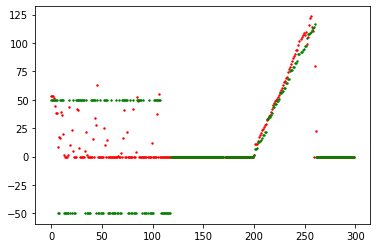

In [46]:
plt.scatter(range(X_train_results[train_show_index].shape[0]), X_train_results[train_show_index], c='r', s = 2)
plt.scatter(range(Y_train[train_show_index].shape[0]), Y_train[train_show_index], c='g', s = 2)

## X_test plot

In [15]:
X_test_results = model.predict(X_test)

In [16]:
test_show_index = 7

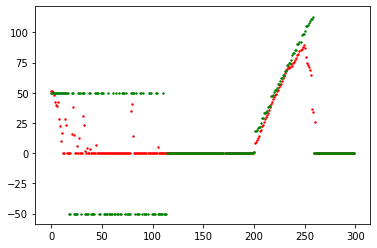

In [17]:
plt.scatter(range(X_test_results[test_show_index].shape[0]), X_test_results[test_show_index], c='r', s = 2)
plt.scatter(range(Y_test[test_show_index].shape[0]), Y_test[test_show_index], c='g', s = 2)

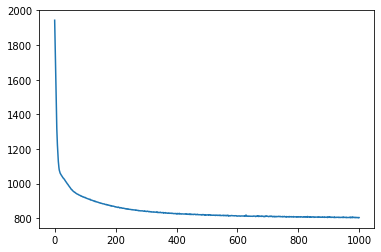

In [18]:
plt.plot(history.history['loss'])
plt.show()